In [2]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install scikit-learn==0.24
!pip install imbalanced-learn==0.8.0



  Using cached scikit-learn-0.24.0.tar.gz (7.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [65 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\mauli\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\ma

In [4]:
import sklearn
print(sklearn.__version__)




1.6.1


In [5]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
print(sklearn.__version__)

1.6.1


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.utils._param_validation import _MissingValues

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

In [9]:
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.6,Yes


In [10]:
df.shape

(7043, 21)

In [11]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# dropping customer_id colums which is not required for modelling
df = df.drop(columns=["customerID"])

In [14]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [15]:
# printing unique values in the columns
numerical_feature_lists =["tenure","MonthlyCharges","TotalCharges"]
for col in df.columns:
    if col not in numerical_feature_lists:
        print(col,df[col].unique())
        print("-"*50)

Gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
Tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes']
--------------------------------------------------
OnlineBackup ['Yes' 'No']
--------------------------------------------------
DeviceProtection ['

In [16]:
print(df.isnull().sum())

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [17]:
# change the datatype
#df["TotalCharges"]=df["TotalCharges"].astype(float)

In [18]:
df[df["TotalCharges"]==" "]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Manual,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Manual,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Manual,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Manual,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Manual,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Manual,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Manual,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Manual,73.35,,No


In [19]:
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0.0"})

In [20]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [22]:
#cheacking the distrubution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [23]:
#Insights
#1.Removed cust_id
#2.No missing values
#3.Missing values in Totalcharges are replaced with 0
#4.Class imballance identified in target

In [24]:
#EDA Explotary data analysis

In [25]:
df.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.50,No


In [26]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
def plot_histogram(df,column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name],kde=True)
    plt.title(f"Distrubution of {column_name}")
    # calculate mean and median of column name
    
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    
    plt.axvline(col_mean,color="red",linestyle="dashed",label="Mean")
    plt.axvline(col_median,color="blue",linestyle="dashed",label="Median")
    plt.legend()
    plt.show()
    

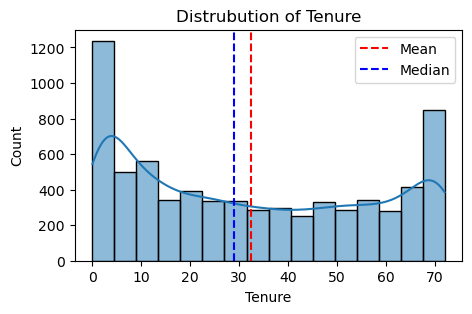

In [28]:
 plot_histogram(df,"Tenure")

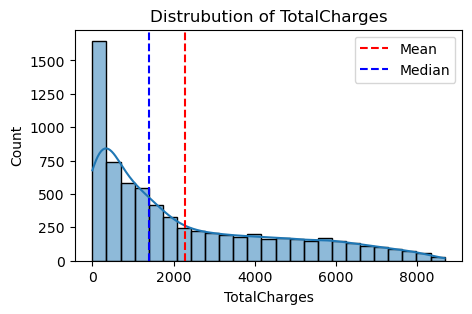

In [29]:
plot_histogram(df,"TotalCharges")

 plot_histogram(df,"TotalCharges")

# Box plot for numerical features

In [30]:
def box_plot(df,column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Distrubution of {column_name}")
    plt.yleble(column_name)
    plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'yleble'

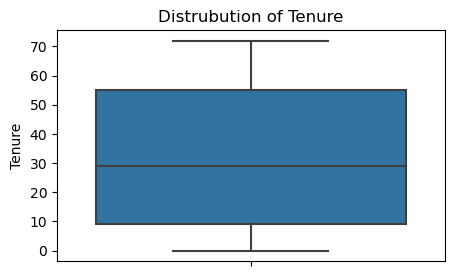

In [31]:
box_plot(df,"Tenure")

AttributeError: module 'matplotlib.pyplot' has no attribute 'yleble'

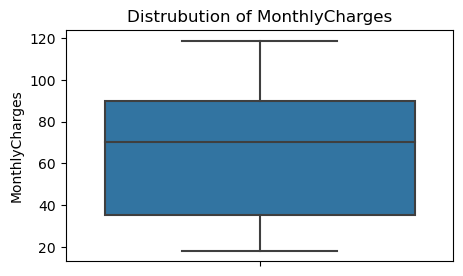

In [32]:
box_plot(df,"MonthlyCharges")

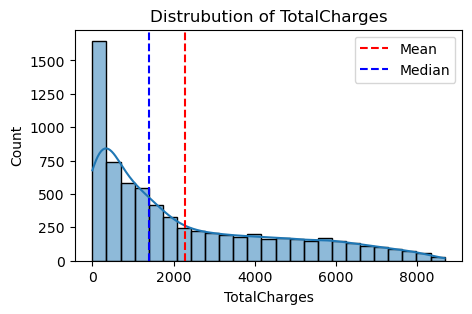

In [33]:
plot_histogram(df,"TotalCharges")

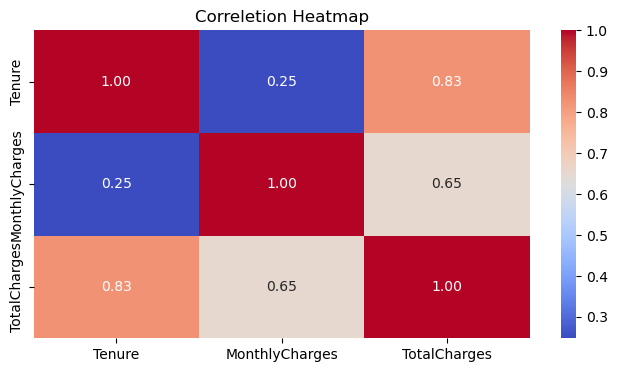

In [34]:
# Coreletion matrix
plt.figure(figsize=(8,4))
sns.heatmap(df[["Tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correletion Heatmap")
plt.show()

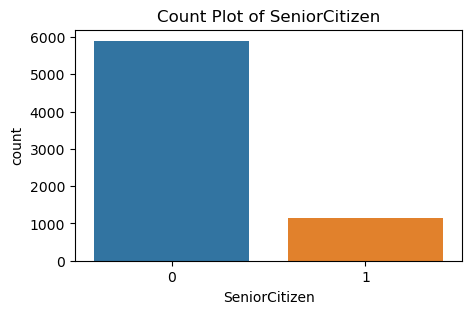

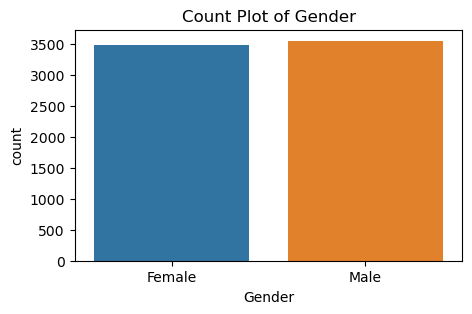

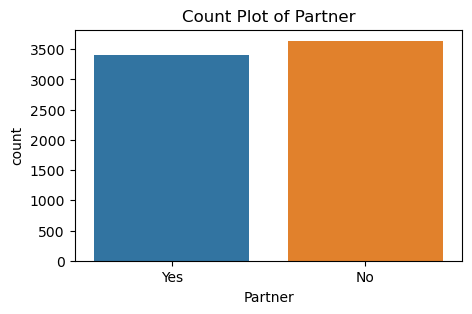

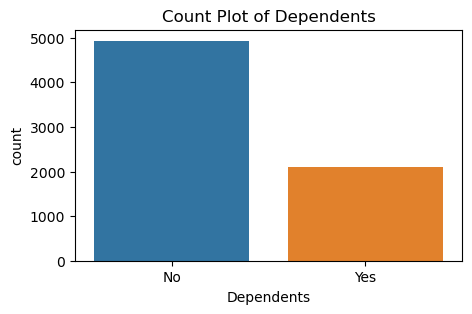

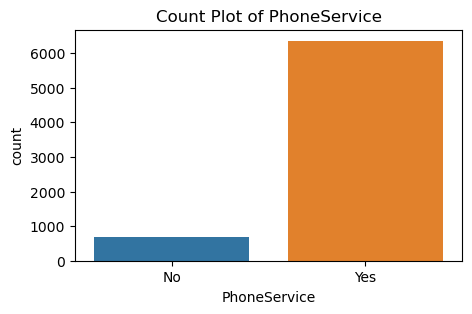

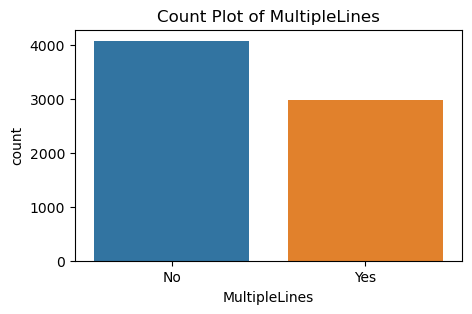

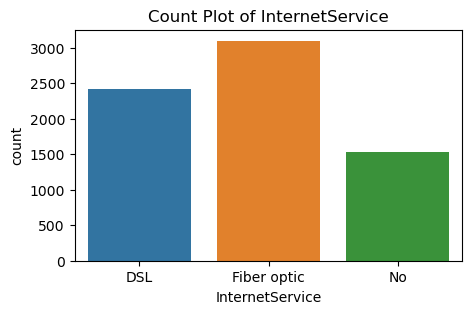

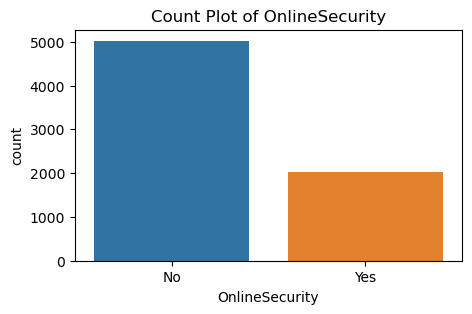

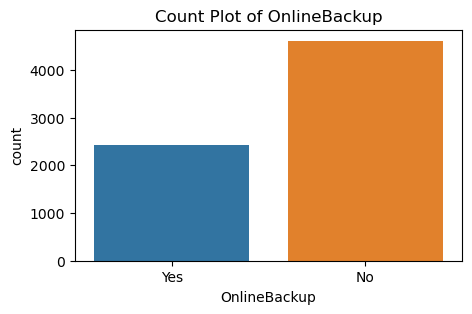

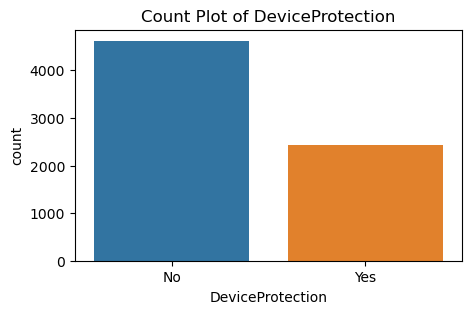

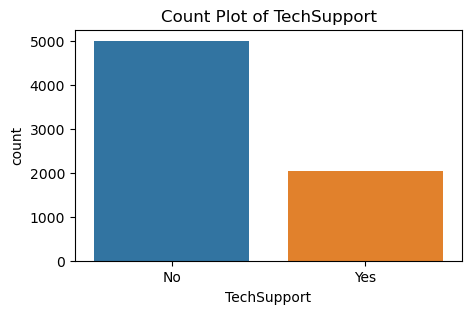

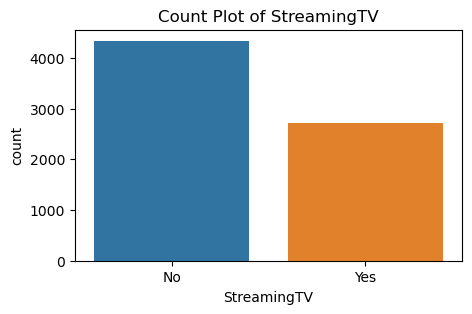

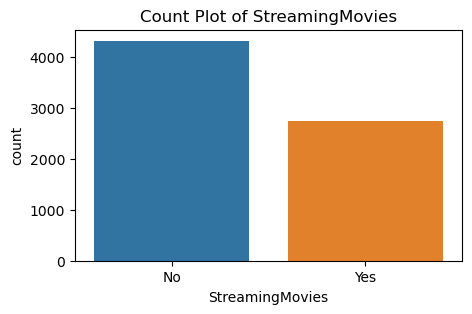

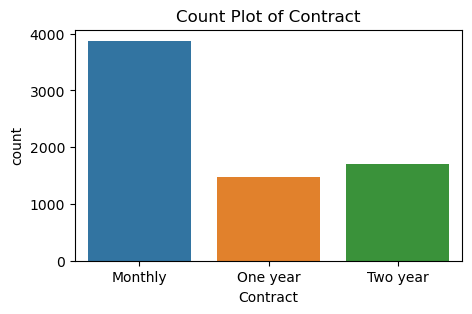

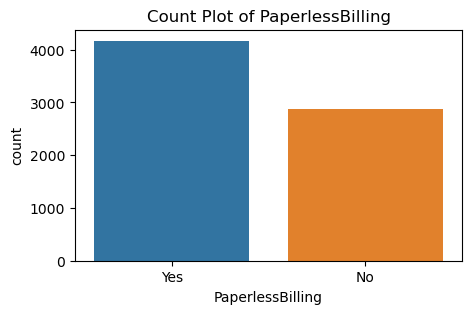

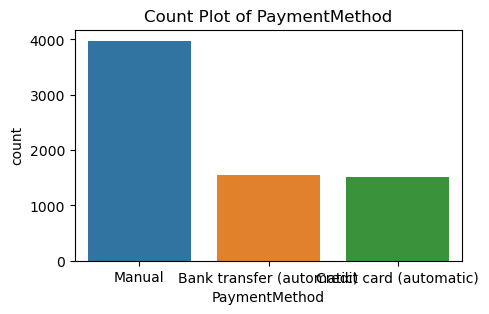

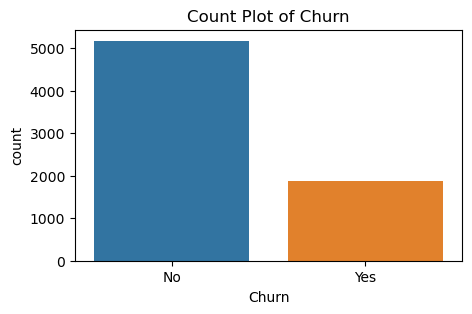

In [35]:
object_colls = df.select_dtypes(include="object").columns.to_list()
object_colls =["SeniorCitizen"]+object_colls

for col in object_colls:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.show()

# Data Preprocessing

In [36]:
df.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.50,No


In [37]:
#Encoding of target column
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})

In [38]:
df.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.50,0


In [39]:
#Lebal encoding of catogorical features
#object datatype
object_columns = df.select_dtypes(include="object").columns
object_columns

Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [40]:
import pickle
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in object_columns:
    lebal_encoder = LabelEncoder()
    df[col]=lebal_encoder.fit_transform(df[col])
    encoders[col] = lebal_encoder
    
#save encoder to pickle file

with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)

In [41]:
encoders

{'Gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [42]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Training and Test data split

In [43]:
# split features and target

# take x as features and y as target

X = df.drop(columns=["Churn"])
y = df["Churn"]

In [44]:
X

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,2,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,2,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,2,84.80,1990.50
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,2,74.40,306.60


In [45]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [46]:
# slplit training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 42)

In [47]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


# Synthetic Minority Oversampling Technique(SMOT)


In [53]:
from imblearn.over_sampling import SMOTE





In [54]:
smote = SMOTE(random_state=42)

In [55]:
X_train_smote,y_train_smote =smote.fit_resample(X_train,y_train)

C:\Users\mauli\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [56]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [57]:
print(y_train_smote.shape)

(8276,)


# Model Training

In [61]:

from sklearn.model_selection import cross_val_score



In [62]:
# dictonary of models
models ={
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    #"XGBoost" : XGBClassifier(random_state=42)
}

In [63]:
#dictonary to store cross validation
cv_scores = {}

for model_name,model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross validation accuracy :{np.mean(scores):.2f}")

Training Decision Tree with default parameters
Decision Tree cross validation accuracy :0.78
Training Random Forest with default parameters
Random Forest cross validation accuracy :0.83


In [64]:
cv_scores

{'Decision Tree': array([0.69142512, 0.71722054, 0.80845921, 0.85075529, 0.83867069]),
 'Random Forest': array([0.73429952, 0.77160121, 0.88821752, 0.881571  , 0.89667674])}

In [65]:
rfc =RandomForestClassifier(random_state=42)

In [66]:
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [67]:
 # Evaluate on testing data
y_test_pred = rfc.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report :\n",classification_report(y_test,y_test_pred))
    

Accuracy Score : 0.7672107877927609
Confusion Matrix :
 [[854 182]
 [146 227]]
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1036
           1       0.56      0.61      0.58       373

    accuracy                           0.77      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.77      0.77      1409



In [68]:
# save the model as pickle file
model_data = {"model" : rfc,"features_names":X.columns.tolist()}

with open("customer_churn_analysis_model.pkl","wb") as f:
    pickle.dump(model_data,f)

In [69]:
model_data

{'model': RandomForestClassifier(random_state=42),
 'features_names': ['Gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'Tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges']}

# Loading saved model and build pridicted system

In [78]:
#model_data = {"model":rfc,"features_names":X.columns.tolist()}
with open("customer_churn_analysis_model.pkl","rb") as f:
    model_data = pickle.load(f)
    
loaded_model = model_data["model"]
feature_name = model_data["features_names"]

In [79]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [80]:
print(feature_name)

['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [85]:
import pandas as pd
import pickle

# Define input data as a dictionary
input_data = {
    "Gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "Tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Monthly",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Manual",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}

# Convert input data to a DataFrame
input_data_df = pd.DataFrame([input_data])

# Load encoders
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Encode categorical features
for column, encoder in encoders.items():
    if column in input_data_df.columns:  # Ensure the column exists in the input data
        input_data_df[column] = encoder.transform(input_data_df[column])

# Display the transformed DataFrame
print(input_data_df.head())


   Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0       0              0        1           0       1             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                0               0             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  


In [87]:
input_data_df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85


In [88]:
encoders

{'Gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [90]:
pridiction = loaded_model.predict(input_data_df)
print(pridiction)

predict_prob = loaded_model.predict_proba(input_data_df)

#results
print(f"Pridiction :{'Churn' if pridiction[0]==1 else 'No churn'}")
print(f"Pridiction Probablity :{predict_prob}")

[0]
Pridiction :No churn
Pridiction Probablity :[[0.81 0.19]]
